In [35]:
import tabulate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
files = ['mpi_code/times.dat', 'openACC_code/times.dat']

In [10]:

lines = []
data_frames = []
n_line = 0
for index in range(len(files)):
	with open(files[index]) as file:	
		for line in file.readlines():
			lines += [line.split()]
			n_line+=1

	for i in range(len(lines[0])):
		lines[0][i] = lines[0][i].replace(",","")

	for line in lines[1:]:
		line[1:] = (np.array(line[1:])).astype(np.double) 

	#lines =  lines[0:len(lines)-3]
	df = pd.DataFrame(lines[1:])
	df.columns = lines[0]
	data_frames.append(df)
	lines = []

for i in data_frames:
	display(i)

,size,n_proc_tot,it,total_time,compute_time,comm_time
0,20000,32.0,1000.0,139.526936,134.501257,5.025079
1,20000,64.0,1000.0,70.516297,67.110289,3.405460
2,20000,128.0,1000.0,41.123080,33.614052,7.508456
3,20000,256.0,1000.0,18.662080,16.832216,1.829346
4,40000,32.0,1000.0,555.990919,549.766902,6.223449
5,40000,64.0,1000.0,279.884441,274.526205,5.357646
6,40000,128.0,1000.0,141.258567,137.228350,4.029665
7,40000,256.0,1000.0,71.670119,68.636387,3.033182


,size,n_proc_tot,it,total_time,compute_time,comm_time
0,20000,4.0,1000.0,15.792946,7.029930,8.543332
1,20000,8.0,1000.0,6.167610,4.293189,1.754510
2,20000,16.0,1000.0,3.015253,1.251105,1.701608
3,20000,32.0,1000.0,1.860847,0.885237,0.940177
4,40000,8.0,1000.0,38.894875,34.090663,4.366049
5,40000,16.0,1000.0,17.819228,11.605358,5.993134
6,40000,32.0,1000.0,7.810470,5.197462,2.494697


[5.025078917, 3.40545974, 7.508456484, 1.829346472]
[134.501257499, 67.110289031, 33.614052083, 16.832216095]
[32.0, 64.0, 128.0, 256.0]
[8.543331535999, 1.754510486964, 1.70160794165, 0.940177439246]
[7.029930434655, 4.293189130258, 1.251104952302, 0.885237202514]
[4.0, 8.0, 16.0, 32.0]
['N = 32.0', 'N = 64.0', 'N = 128.0', 'N = 256.0', 'N = 4.0', 'N = 8.0', 'N = 16.0', 'N = 32.0']
[0, 1, 2, 3, 0.25, 1.25, 2.25, 3.25]


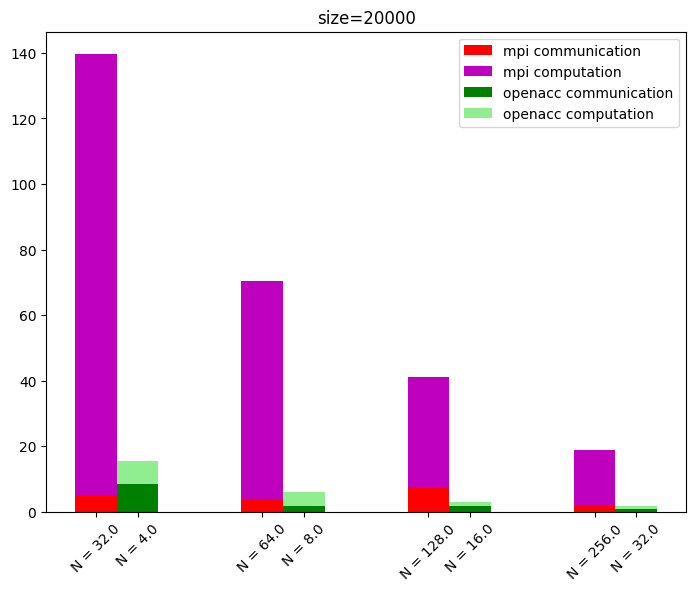

In [49]:
def plot(df_array):

    comm_time_mpi = []
    compute_time_mpi = []
    name_mpi = []
    comm_time_openacc = []
    compute_time_openacc = []
    name_openacc = []

    target='20000'
    for i in range(len(df_array[0]["comm_time"])): 
        if df_array[0]["size"][i]==target:
            comm_time_mpi.append(df_array[0]["comm_time"][i])
            compute_time_mpi.append(df_array[0]["compute_time"][i])
            name_mpi.append(df_array[0]["n_proc_tot"][i])

    print(comm_time_mpi)
    print(compute_time_mpi)
    print(name_mpi)

    for i in range(len(df_array[1]["size"])): 
        if df_array[1]["size"][i]==target:
            comm_time_openacc.append(df_array[1]["comm_time"][i])
            compute_time_openacc.append(df_array[1]["compute_time"][i])
            name_openacc.append(df_array[1]["n_proc_tot"][i])

    print(comm_time_openacc)
    print(compute_time_openacc)
    print(name_openacc)

    X = np.arange(len(comm_time_mpi))
    X_ticks = [0,1,2,3]
    for i in range(len(X)):
        X_ticks.append(X[i]+0.25)
    #print(X)

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    ax.bar(X , comm_time_mpi, color = 'r', width = 0.25)
    ax.bar(X , compute_time_mpi, bottom=comm_time_mpi, color = 'm', width = 0.25)
    ax.bar(X + 0.25, comm_time_openacc, color = 'g', width = 0.25)
    ax.bar(X + 0.25, compute_time_openacc, bottom=comm_time_openacc, color = 'LightGreen', width = 0.25)

    ticks = ['N = ' + str(size) for size in name_mpi]
    for size in name_openacc:
        ticks.append('N = ' +str(size) )
    print(ticks)
    print(X_ticks)
    ax.set_xticks(X_ticks, (ticks))

    ax.legend(labels=['mpi communication', 'mpi computation', 'openacc communication',  'openacc computation'])
    plt.xticks(fontsize=10, rotation=45)
    plt.title('size=20000')
    plt.show()

  
plot(data_frames)